In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib.image as mpimg

In [2]:
# Daten einlesen
df = pd.read_excel(r"C:\Users\ilyas\OneDrive\Desktop\cda2_versuch3000\Daten\Schlieren_20231019_Labels2.xlsx")
df

,Frame,Objekt,Objekt ID,Objektlabel,Konfidenz,Trackingstatus,x,y,z,vx,xy,vz
0,0,0,0,Person,91.5527,OFF,0.412082,-0.033244,0.582146,-nan(ind),-nan(ind),-nan(ind)
1,1,0,0,Person,94.5312,OFF,0.411712,-0.033519,0.581352,-0.0071204,-0.103731,-0.250922
2,2,0,0,Person,95.0684,OFF,0.410423,-0.033713,0.580943,0.262121,0.019134,0.106129
3,3,0,0,Person,95.4102,OK,0.407161,-0.033854,0.580515,0.163614,0.0194861,0.0531754
4,4,0,0,Person,94.9219,OK,0.402986,-0.033996,0.579703,0.133001,0.0152007,0.0481691
...,...,...,...,...,...,...,...,...,...,...,...,...
2989,1816,0,0,Person,76.1230,OK,0.298340,-0.089418,0.527206,-0.00377044,-0.00264915,-0.0149671
2990,1817,0,0,Person,81.8848,OK,0.311227,-0.087654,0.527808,-0.00971202,-0.00682199,-0.0385568
2991,1818,0,0,Person,82.1777,OK,0.325887,-0.085660,0.529864,-0.0181163,-0.0127259,-0.0719271
2992,1819,0,0,Person,83.4473,OK,0.336964,-0.082108,0.536360,-0.327357,-0.0163044,-0.0938141


In [3]:
import numpy as np
import pandas as pd

# Drei Kalibrierungspunkte
P1 = np.array([1.763, 0.110, 16.476])
P2 = np.array([9.341, 0.435, 16.512])
P3 = np.array([-1.079, 0.430, 8.327])

# Basisvektoren
r1 = P2 - P1  # parallel zum Netz, wird x
r2 = -(P3 - 0.5 * (P1 + P2))  # entlang Spielfeld, wird y

# Einheitsvektoren
r1u = r1 / np.linalg.norm(r1)
r2u = r2 / np.linalg.norm(r2)
r3u = np.cross(r1u, r2u)

# Translation, Ursprung in den nicht-kalibrierten Koordinaten
T0 = 0.5 * (P1 + P2) + 0.25 * r2u

# Transformationsmatrix erstellen
R = np.array([r1u, r2u, r3u]).T

def transform_coordinates(x, y, z):
    """ Transformiert die gegebenen Koordinaten nach dem definierten System. """
    original_coords = np.array([x, y, z]) - T0
    transformed_coords = R.T @ original_coords
    return transformed_coords

# Anwendung der Transformation auf den DataFrame
df_transformed = df.copy()
df_transformed[['x', 'y', 'z']] = df.apply(
    lambda row: transform_coordinates(row['x'], row['y'], row['z']),
    axis=1, result_type='expand'
)

# Anzeigen des transformierten DataFrames
df_transformed


,Frame,Objekt,Objekt ID,Objektlabel,Konfidenz,Trackingstatus,x,y,z,vx,xy,vz
0,0,0,0,Person,91.5527,OFF,-5.381938,-15.836372,0.732550,-nan(ind),-nan(ind),-nan(ind)
1,1,0,0,Person,94.5312,OFF,-5.382323,-15.837218,0.732783,-0.0071204,-0.103731,-0.250922
2,2,0,0,Person,95.0684,OFF,-5.383621,-15.838345,0.732907,0.262121,0.019134,0.106129
3,3,0,0,Person,95.4102,OK,-5.386888,-15.840731,0.732925,0.163614,0.0194861,0.0531754
4,4,0,0,Person,94.9219,OK,-5.391069,-15.843990,0.732930,0.133001,0.0152007,0.0481691
...,...,...,...,...,...,...,...,...,...,...,...,...
2989,1816,0,0,Person,76.1230,OK,-5.498242,-15.949865,0.774460,-0.00377044,-0.00264915,-0.0149671
2990,1817,0,0,Person,81.8848,OK,-5.485289,-15.941302,0.773501,-0.00971202,-0.00682199,-0.0385568
2991,1818,0,0,Person,82.1777,OK,-5.470547,-15.930496,0.772363,-0.0181163,-0.0127259,-0.0719271
2992,1819,0,0,Person,83.4473,OK,-5.459297,-15.918525,0.769716,-0.327357,-0.0163044,-0.0938141


In [4]:
# Extrahieren von Objekt 0 und Speichern in einem neuen DataFrame
Person = df_transformed[df_transformed['Objekt'] == 0].copy()

# Überprüfen der ersten Zeilen des neuen DataFrames
Person.head()


,Frame,Objekt,Objekt ID,Objektlabel,Konfidenz,Trackingstatus,x,y,z,vx,xy,vz
0,0,0,0,Person,91.5527,OFF,-5.381938,-15.836372,0.732550,-nan(ind),-nan(ind),-nan(ind)
1,1,0,0,Person,94.5312,OFF,-5.382323,-15.837218,0.732783,-0.0071204,-0.103731,-0.250922
2,2,0,0,Person,95.0684,OFF,-5.383621,-15.838345,0.732907,0.262121,0.019134,0.106129
3,3,0,0,Person,95.4102,OK,-5.386888,-15.840731,0.732925,0.163614,0.0194861,0.0531754
4,4,0,0,Person,94.9219,OK,-5.391069,-15.843990,0.732930,0.133001,0.0152007,0.0481691


In [5]:
# Sicherstellen, dass die Geschwindigkeitswerte numerisch sind
Person[['vx', 'xy', 'vz']] = Person[['vx', 'xy', 'vz']].apply(pd.to_numeric, errors='coerce')

# Berechnung der Geschwindigkeit als euklidische Norm der Geschwindigkeitskomponenten
Person['speed'] = np.sqrt(Person['vx']**2 + Person['xy']**2 + Person['vz']**2)

# Entfernen von Ausreißern mit der IQR-Methode
Q1 = Person['speed'].quantile(0.25)
Q3 = Person['speed'].quantile(0.75)
IQR = Q3 - Q1

# Definieren der Grenzen für akzeptable Werte (1.5 * IQR Regel)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Entfernen der Ausreißer
Person_cleaned = Person[(Person['speed'] >= lower_bound) & (Person['speed'] <= upper_bound)]

# Überprüfung der bereinigten Werte
print(f"Anzahl der ursprünglichen Datenpunkte: {len(Person)}")
print(f"Anzahl der Datenpunkte nach Ausreißerentfernung: {len(Person_cleaned)}")
print(Person_cleaned[['Frame', 'vx', 'xy', 'vz', 'speed']].head())

Anzahl der ursprünglichen Datenpunkte: 1821
Anzahl der Datenpunkte nach Ausreißerentfernung: 1819
   Frame        vx        xy        vz     speed
1      1 -0.007120 -0.103731 -0.250922  0.271611
2      2  0.262121  0.019134  0.106129  0.283438
3      3  0.163614  0.019486  0.053175  0.173138
4      4  0.133001  0.015201  0.048169  0.142269
5      5 -0.010354  0.003503  0.003242  0.011401


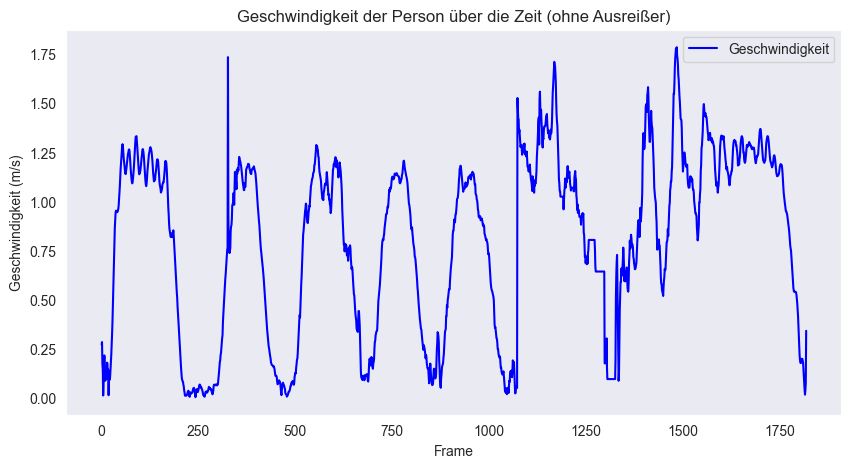

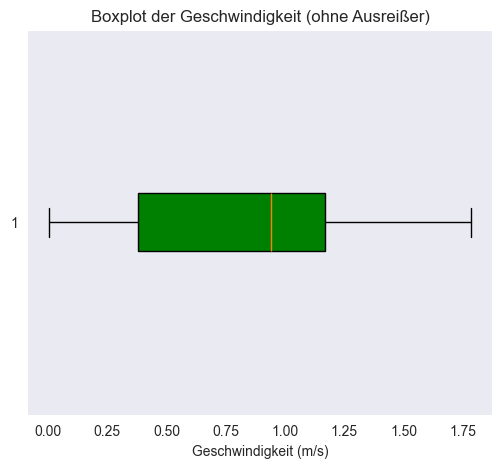

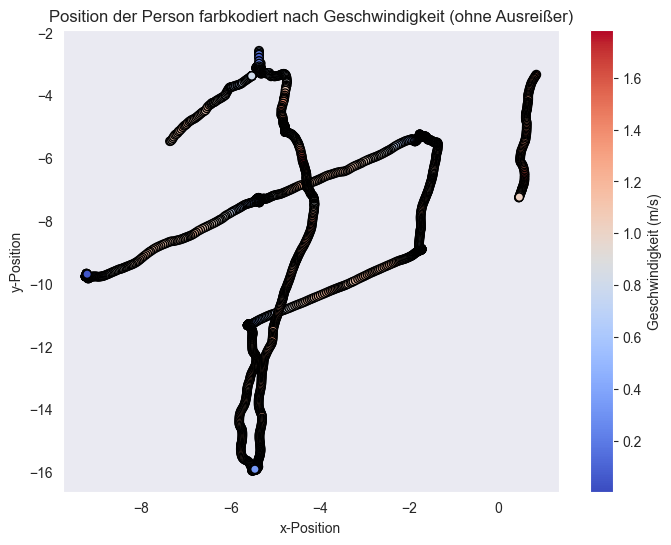

In [6]:
# Plot 1: Geschwindigkeit über die Zeit ohne Ausreißer
plt.figure(figsize=(10, 5))
plt.plot(Person_cleaned['Frame'], Person_cleaned['speed'], label='Geschwindigkeit', color='blue')
plt.xlabel('Frame')
plt.ylabel('Geschwindigkeit (m/s)')
plt.title('Geschwindigkeit der Person über die Zeit (ohne Ausreißer)')
plt.legend()
plt.grid()
plt.show()

# Plot 2: Boxplot der Geschwindigkeit ohne Ausreißer
plt.figure(figsize=(6, 5))
plt.boxplot(Person_cleaned['speed'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='green', color='black'))
plt.xlabel('Geschwindigkeit (m/s)')
plt.title('Boxplot der Geschwindigkeit (ohne Ausreißer)')
plt.grid()
plt.show()

# Plot 3: Scatterplot Position (x, y) farbkodiert nach Geschwindigkeit ohne Ausreißer
plt.figure(figsize=(8, 6))
sc = plt.scatter(Person_cleaned['x'], Person_cleaned['y'], c=Person_cleaned['speed'], cmap='coolwarm', edgecolors='k')
plt.colorbar(sc, label='Geschwindigkeit (m/s)')
plt.xlabel('x-Position')
plt.ylabel('y-Position')
plt.title('Position der Person farbkodiert nach Geschwindigkeit (ohne Ausreißer)')
plt.grid()
plt.show()

In [7]:
# Berechnung der Statistik für die Geschwindigkeit ohne Ausreißer
median_speed = Person_cleaned['speed'].median()
mean_speed = Person_cleaned['speed'].mean()
min_speed = Person_cleaned['speed'].min()
max_speed = Person_cleaned['speed'].max()

# Formattierte Ausgabe der Ergebnisse
output = f"""
Die durchschnittliche Geschwindigkeit beträgt {mean_speed:.3f} m/s, was den Mittelwert der Bewegung darstellt.
Die Median-Geschwindigkeit, die den zentralen Wert der Verteilung beschreibt, liegt bei {median_speed:.3f} m/s.
Die niedrigste aufgezeichnete Geschwindigkeit beträgt {min_speed:.7f} m/s, was auf Momente nahezu ohne Bewegung hindeutet.
Die höchste erreichte Geschwindigkeit beträgt {max_speed:.3f} m/s, was den schnellsten Moment während der Spielbewegung repräsentiert.

Diese Analyse zeigt, dass die Person typischerweise mit einer Geschwindigkeit von etwa {mean_speed:.3f} m/s unterwegs ist, 
wobei Spitzenwerte bis zu {max_speed:.3f} m/s erreicht wurden.
"""

# Ergebnisse ausgeben
print(output)



Die durchschnittliche Geschwindigkeit beträgt 0.806 m/s, was den Mittelwert der Bewegung darstellt.
Die Median-Geschwindigkeit, die den zentralen Wert der Verteilung beschreibt, liegt bei 0.940 m/s.
Die niedrigste aufgezeichnete Geschwindigkeit beträgt 0.0025828 m/s, was auf Momente nahezu ohne Bewegung hindeutet.
Die höchste erreichte Geschwindigkeit beträgt 1.785 m/s, was den schnellsten Moment während der Spielbewegung repräsentiert.

Diese Analyse zeigt, dass die Person typischerweise mit einer Geschwindigkeit von etwa 0.806 m/s unterwegs ist, 
wobei Spitzenwerte bis zu 1.785 m/s erreicht wurden.



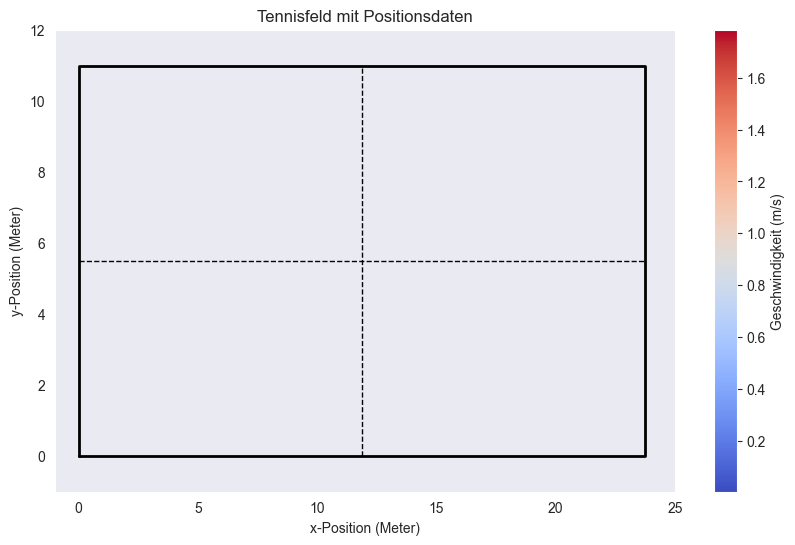

In [8]:
def draw_tennis_court():
    plt.plot([0, 0, 23.77, 23.77, 0], [0, 10.97, 10.97, 0, 0], 'k-', linewidth=2)  # Spielfeldrand
    plt.plot([11.885, 11.885], [0, 10.97], 'k--', linewidth=1)  # Mittellinie
    plt.plot([0, 23.77], [5.485, 5.485], 'k--', linewidth=1)  # Netzlinie
    plt.xlabel("x-Position (Meter)")
    plt.ylabel("y-Position (Meter)")
    plt.title("Tennisfeld mit Positionsdaten")
    plt.xlim(-1, 25)
    plt.ylim(-1, 12)

plt.figure(figsize=(10, 6))
draw_tennis_court()
plt.scatter(Person_cleaned['x'], Person_cleaned['y'], c=Person_cleaned['speed'], cmap='coolwarm', edgecolors='k')
plt.colorbar(label='Geschwindigkeit (m/s)')
plt.grid()
plt.show()


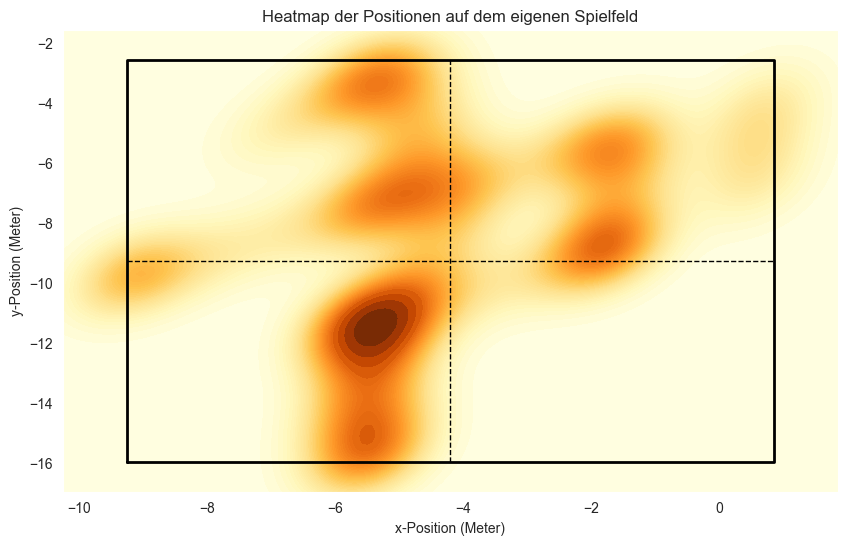

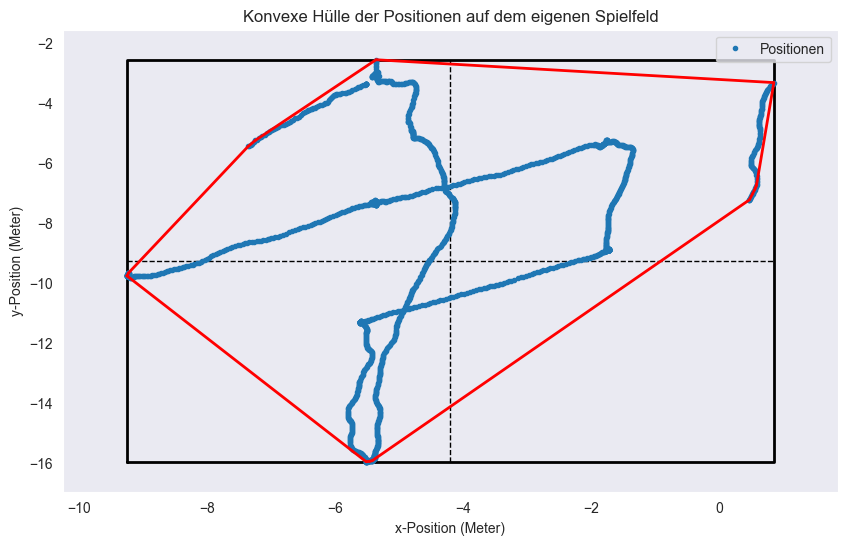

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
import seaborn as sns

# Anpassung der Tennisfeld-Dimensionen an die Daten
x_min, x_max = Person_cleaned['x'].min(), Person_cleaned['x'].max()
y_min, y_max = Person_cleaned['y'].min(), Person_cleaned['y'].max()

def draw_tennis_court():
    plt.plot([x_min, x_min, x_max, x_max, x_min], 
             [y_min, y_max, y_max, y_min, y_min], 'k-', linewidth=2)  # Spielfeldrand
    plt.plot([(x_min + x_max) / 2, (x_min + x_max) / 2], 
             [y_min, y_max], 'k--', linewidth=1)  # Mittellinie
    plt.plot([x_min, x_max], 
             [(y_min + y_max) / 2, (y_min + y_max) / 2], 'k--', linewidth=1)  # Netzlinie
    plt.xlabel("x-Position (Meter)")
    plt.ylabel("y-Position (Meter)")
    plt.xlim(x_min - 1, x_max + 1)
    plt.ylim(y_min - 1, y_max + 1)
    plt.grid()

# Plot 1: Heatmap der Positionen 
plt.figure(figsize=(10, 6))
draw_tennis_court()
sns.kdeplot(x=Person_cleaned['x'], y=Person_cleaned['y'], cmap="YlOrBr", fill=True, levels=50, thresh=0)
plt.title('Heatmap der Positionen auf dem eigenen Spielfeld')
plt.show()

# Plot 2: Konvexe Hülle der Positionen 
plt.figure(figsize=(10, 6))
draw_tennis_court()
points = Person_cleaned[['x', 'y']].values
hull = ConvexHull(points)
plt.plot(points[:, 0], points[:, 1], 'o', markersize=3, label='Positionen')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-', linewidth=2)
plt.title('Konvexe Hülle der Positionen auf dem eigenen Spielfeld')
plt.legend()
plt.show()

In [10]:
# Sicherstellen, dass x und y numerisch sind, um Berechnungsfehler zu vermeiden
Person[['x', 'y']] = Person[['x', 'y']].apply(pd.to_numeric, errors='coerce')

# Berechnung der Richtung (Winkel in Radiant) zwischen aufeinanderfolgenden Positionen
Person['direction'] = np.arctan2(Person['y'].diff(), Person['x'].diff())

# Berechnung der Richtungsänderung (absolute Änderung der Richtung)
Person['angular_change'] = np.abs(np.diff(Person['direction'], prepend=Person['direction'].iloc[0]))

# Überprüfung der ersten Zeilen mit den neuen Spalten
print(Person[['Frame', 'x', 'y', 'direction', 'angular_change']].head())

   Frame         x          y  direction  angular_change
0      0 -5.381938 -15.836372        NaN             NaN
1      1 -5.382323 -15.837218  -1.998338             NaN
2      2 -5.383621 -15.838345  -2.426627        0.428289
3      3 -5.386888 -15.840731  -2.510799        0.084172
4      4 -5.391069 -15.843990  -2.479423        0.031376


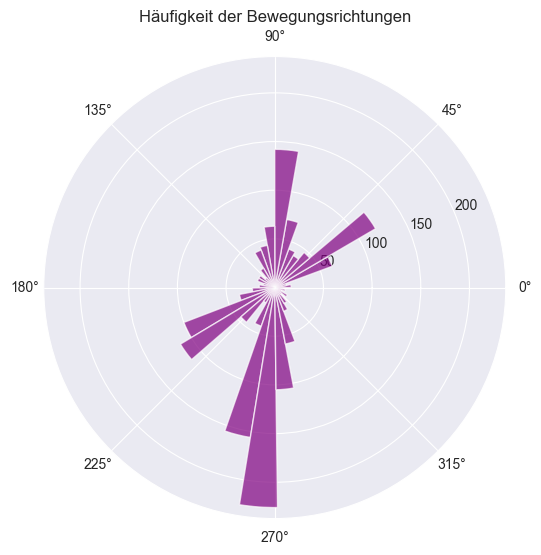

In [11]:
# Sicherstellen, dass x und y numerisch sind, um Berechnungsfehler zu vermeiden
Person[['x', 'y']] = Person[['x', 'y']].apply(pd.to_numeric, errors='coerce')

# Berechnung der Richtung (Winkel in Radiant) zwischen aufeinanderfolgenden Positionen
Person['direction'] = np.arctan2(Person['y'].diff(), Person['x'].diff())

# Berechnung der Richtungsänderung (absolute Änderung der Richtung)
Person['angular_change'] = np.abs(np.diff(Person['direction'], prepend=Person['direction'].iloc[0]))

plt.figure(figsize=(6, 6))
plt.subplot(projection='polar')
plt.hist(Person['direction'].dropna(), bins=36, color='purple', alpha=0.7)
plt.title('Häufigkeit der Bewegungsrichtungen')
plt.show()

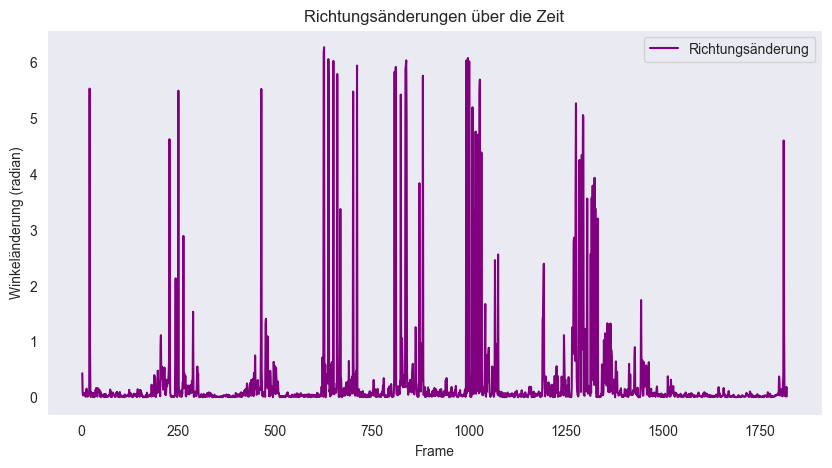

In [12]:

# Plot 2: Richtungsänderung über die Zeit als Linienplot
plt.figure(figsize=(10, 5))
plt.plot(Person['Frame'], Person['angular_change'], label='Richtungsänderung', color='purple')
plt.xlabel('Frame')
plt.ylabel('Winkeländerung (radian)')
plt.title('Richtungsänderungen über die Zeit')
plt.legend()
plt.grid()
plt.show()


In [13]:
Werte nahe 0: Die Person bewegt sich relativ geradlinig.

Werte nahe 𝜋 ≈ 3.14
π≈3.14: Die Person macht eine starke Richtungsänderung (z. B. 180° Wendung).

Werte nahe 2𝜋 ≈ 6.28
2π≈6.28: Dies könnte auf eine vollständige Drehung oder einen Fehler in der Berechnung hindeuten, falls unrealistische Drehungen auftreten.

SyntaxError: invalid character '≈' (U+2248) (2020497248.py, line 3)